In [13]:
import os
import pandas as pd
import numpy as np
os.chdir("E:/1 M A B A/Mining Gan/FinaPro/FP-DataMining")
df = pd.read_csv("osi.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [15]:
df = df.rename(columns={'Administrative_Duration': 'AD', 
                         'Informational_Duration': 'ID',
                         'OperatingSystems': 'OS', 
                         'ProductRelated_Duration': 'PRD'})


In [16]:
df = df.drop_duplicates()

In [17]:
df

,Administrative,AD,Informational,ID,ProductRelated,PRD,BounceRates,ExitRates,PageValues,SpecialDay,Month,OS,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Pembuatan Shiny

In [18]:
'''import shiny
from shiny import App, ui, render, reactive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir("E:/1 M A B A/Mining Gan/FinaPro")
data = pd.read_csv("osi.csv")

data = data.astype({
    'OperatingSystems': 'object',
    'Browser': 'object',
    'Region': 'object',
    'TrafficType': 'object'
})

app_ui = ui.page_fluid(
    ui.layout_sidebar(
        ui.sidebar(
            ui.h1("Online Shoppers Purchasing Intention"),
            ui.input_select("variable", "Select Variable", choices = data.columns.tolist()),
            ui.output_table("summary")
        ),
        ui.page_fixed(
            ui.output_plot("plot")
        )
    )
)

def server(input, output, session):

    @reactive.Calc
    def selected_data():
        return data[input.variable()] 

    @output
    @render.table  
    def summary():
        selected = selected_data()
        if selected.dtype == 'object': 
            return selected.value_counts().reset_index().rename(columns={'index': 'Category', 0: 'Count'})
        elif selected.dtype == 'bool': 
            return selected.value_counts().reset_index().rename(columns={'index': 'Category', 0: 'Count'})
        else:  
            return selected.describe().reset_index().rename(columns={'index': 'Statistic', 0: 'Value'})

    @output
    @render.plot
    def plot():
        selected = selected_data()
        
        plt.figure(figsize=(6, 4))
        
        if selected.dtype == 'bool' or selected.nunique() == 2:
            sns.countplot(x=selected)
            plt.title(f"Bar Plot of {input.variable()} (0 vs 1)")

        elif selected.dtype == 'object': 
            sns.countplot(x=selected)
            plt.title(f"Bar Plot of {input.variable()}")

        # Handle numerical data (histogram)
        else: 
            sns.histplot(selected, kde=True)
            plt.title(f"Histogram of {input.variable()}")

        plt.tight_layout()
        return plt.gcf() 
app = App(app_ui, server)

if __name__ == "__main__":
    app.run()
'''

'import shiny\nfrom shiny import App, ui, render, reactive\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport os\n\n# Set the working directory and load the data\nos.chdir("E:/1 M A B A/Mining Gan/FinaPro")\ndata = pd.read_csv("osi.csv")\n\ndata = data.astype({\n    \'OperatingSystems\' : \'object\',\n    \'Browser\' : \'object\',\n    \'Region\' : \'object\',\n    \'TrafficType\' : \'object\'\n})\n\n# Define UI\napp_ui = ui.page_fluid(\n    ui.input_select("variable", "Select Variable", choices=data.columns.tolist()),\n    ui.output_table("summary"),  # Display summary as a table\n    ui.output_plot("plot")  # Display plot\n)\n\n# Define Server logic\ndef server(input, output, session):\n\n    # Reactive expression to return selected data\n    @reactive.Calc\n    def selected_data():\n        return data[input.variable()]  # Input variable selection\n\n    # Summary Statistics (output as a table)\n    @output\n    @render.table  # 

Jalankan syntax di Python untuk mendapatkan Summary Statistics dan Visualisasi. Lanjut ke Feature Selection/Extraction

## Feature Selection/Extraction

- Analisis Korelasi

-> Encode Months

In [19]:
mm = {
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "June":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12,
}

df['Month'] = df['Month'].map(mm)

-> Encode VisitorType

In [20]:
mvt = {
    "Returning_Visitor":1,
    "New_Visitor":1,
    "Other":3,
}
df['VisitorType'] = df['VisitorType'].map(mvt)

Korelasi antar fitur

In [21]:
x = pd.DataFrame(df, columns = df.columns)
y = pd.Series(df.columns, name = 'target')
corre_mtrx = x.corr()
print("Matrix Korelasi Antar Fitur:\n", corre_mtrx)

Matrix Korelasi Antar Fitur:
                 Administrative        AD  Informational        ID  \
Administrative        1.000000  0.600457       0.375256  0.254813   
AD                    0.600457  1.000000       0.301419  0.237211   
Informational         0.375256  0.301419       1.000000  0.618648   
ID                    0.254813  0.237211       0.618648  1.000000   
ProductRelated        0.428305  0.286863       0.372572  0.279082   
PRD                   0.371146  0.353583       0.386052  0.346596   
BounceRates          -0.213096 -0.136913      -0.109095 -0.069878   
ExitRates            -0.311255 -0.201971      -0.159429 -0.102852   
PageValues            0.097017  0.066228       0.047406  0.030090   
SpecialDay           -0.096951 -0.074666      -0.049350 -0.031261   
Month                 0.094423  0.056250       0.062173  0.043552   
OS                   -0.006586 -0.007529      -0.009721 -0.009734   
Browser              -0.025622 -0.015742      -0.038787 -0.019573   
Regi

In [22]:
threshold = 0.8
high_corr_var = np.where(np.abs(corre_mtrx) > threshold)
high_corr_var = [(corre_mtrx.index[x], corre_mtrx.columns[y])
                 for x, y in zip(*high_corr_var)
                 if x != y and x < y]
print("\nPasangan Fitur dengan Korelasi Tinggi (> 0.8):", high_corr_var)


Pasangan Fitur dengan Korelasi Tinggi (> 0.8): [('ProductRelated', 'PRD'), ('BounceRates', 'ExitRates')]


In [23]:
features_to_remove = [item[1] for item in high_corr_var]
print("\nFitur yang Akan Dihapus:", features_to_remove)


Fitur yang Akan Dihapus: ['PRD', 'ExitRates']


In [24]:
final_features = [feature for feature in x.columns if feature not in features_to_remove]
print("\nFitur Akhir yang Digunakan:", final_features)


Fitur Akhir yang Digunakan: ['Administrative', 'AD', 'Informational', 'ID', 'ProductRelated', 'BounceRates', 'PageValues', 'SpecialDay', 'Month', 'OS', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [25]:
x_final = x[final_features]
print(x_final)

       Administrative     AD  Informational   ID  ProductRelated  BounceRates  \
0                   0    0.0              0  0.0               1     0.200000   
1                   0    0.0              0  0.0               2     0.000000   
2                   0    0.0              0  0.0               1     0.200000   
3                   0    0.0              0  0.0               2     0.050000   
4                   0    0.0              0  0.0              10     0.020000   
...               ...    ...            ...  ...             ...          ...   
12325               3  145.0              0  0.0              53     0.007143   
12326               0    0.0              0  0.0               5     0.000000   
12327               0    0.0              0  0.0               6     0.083333   
12328               4   75.0              0  0.0              15     0.000000   
12329               0    0.0              0  0.0               3     0.000000   

       PageValues  SpecialD

Referensi Heatmap

<Axes: >

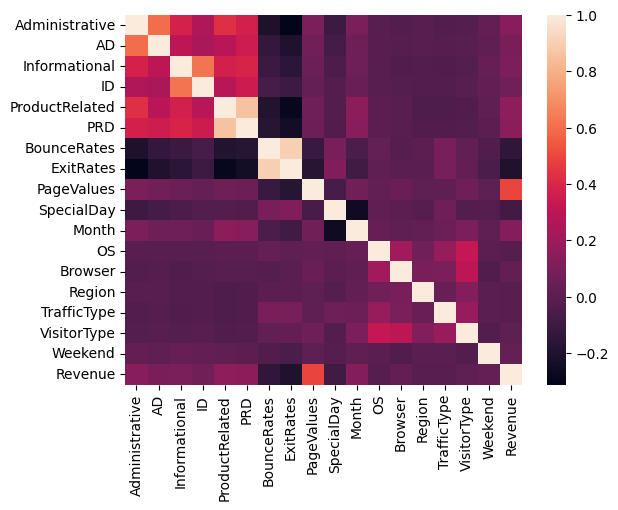

In [26]:
import seaborn as sns
sns.heatmap(corre_mtrx)

- Decision Tree

Decision Tree Rules:
|--- Month <= 4.50
|   |--- Month <= 0.50
|   |   |--- Weekend <= 0.50
|   |   |   |--- class: False
|   |   |--- Weekend >  0.50
|   |   |   |--- class: False
|   |--- Month >  0.50
|   |   |--- Weekend <= 0.50
|   |   |   |--- Month <= 3.50
|   |   |   |   |--- Month <= 1.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- Month >  1.50
|   |   |   |   |   |--- Month <= 2.50
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- Month >  2.50
|   |   |   |   |   |   |--- class: False
|   |   |   |--- Month >  3.50
|   |   |   |   |--- class: False
|   |   |--- Weekend >  0.50
|   |   |   |--- Month <= 3.50
|   |   |   |   |--- Month <= 2.50
|   |   |   |   |   |--- Month <= 1.50
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- Month >  1.50
|   |   |   |   |   |   |--- class: False
|   |   |   |   |--- Month >  2.50
|   |   |   |   |   |--- class: False
|   |   |   |--- Month >  3.50
|   |   |   |   |--- class: False
|--- M

[Text(0.5022321428571429, 0.9285714285714286, 'Month <= 4.5\ngini = 0.264\nsamples = 12205\nvalue = [10297, 1908]'),
 Text(0.17857142857142858, 0.7857142857142857, 'Month <= 0.5\ngini = 0.192\nsamples = 6087\nvalue = [5432, 655]'),
 Text(0.34040178571428575, 0.8571428571428572, 'True  '),
 Text(0.07142857142857142, 0.6428571428571429, 'Weekend <= 0.5\ngini = 0.033\nsamples = 181\nvalue = [178, 3]'),
 Text(0.03571428571428571, 0.5, 'gini = 0.026\nsamples = 153\nvalue = [151, 2]'),
 Text(0.10714285714285714, 0.5, 'gini = 0.069\nsamples = 28\nvalue = [27, 1]'),
 Text(0.2857142857142857, 0.6428571428571429, 'Weekend <= 0.5\ngini = 0.196\nsamples = 5906\nvalue = [5254, 652]'),
 Text(0.17857142857142858, 0.5, 'Month <= 3.5\ngini = 0.184\nsamples = 4563\nvalue = [4096, 467]'),
 Text(0.14285714285714285, 0.35714285714285715, 'Month <= 1.5\ngini = 0.178\nsamples = 4235\nvalue = [3818, 417]'),
 Text(0.10714285714285714, 0.21428571428571427, 'gini = 0.167\nsamples = 1382\nvalue = [1255, 127]'),
 

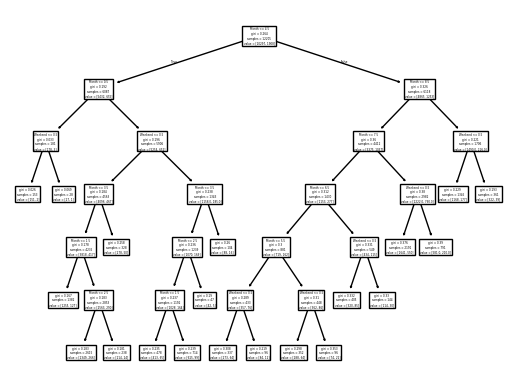

In [27]:
from matplotlib.pylab import rand
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

le_m = LabelEncoder()
le_vt = LabelEncoder()

df['Month'] = le_m.fit_transform(df['Month'])
df['VisitorType'] = le_vt.fit_transform(df['VisitorType'])

X = df[['Month','Weekend']]
Y = df['Revenue']

cl = DecisionTreeClassifier(random_state = 30)
cl.fit(X,Y)

from sklearn import tree
print("Decision Tree Rules:")
tree_rules = tree.export_text(cl, feature_names = ['Month','Weekend'])
print(tree_rules)
tree.plot_tree(cl, feature_names = ['Month','Weekend'])

## Classification Analysis

- Random Forest

Akurasi Model:  0.889389594428513

Classification Report: 
               precision    recall  f1-score   support

       False       0.92      0.96      0.94      2062
        True       0.69      0.53      0.60       379

    accuracy                           0.89      2441
   macro avg       0.80      0.74      0.77      2441
weighted avg       0.88      0.89      0.88      2441



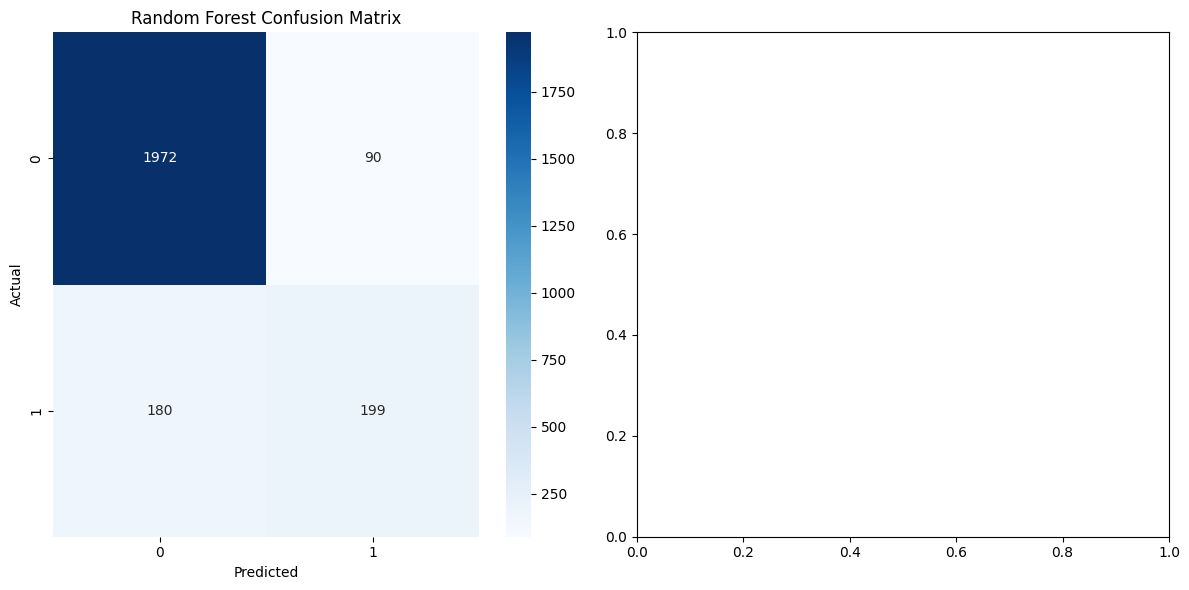

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['Administrative', 'AD', 'Informational', 'ID', 'ProductRelated', 'PRD', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OS', 'Browser', 
        'Region', 'Month', 'TrafficType', 'VisitorType', 'Weekend']]
Y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 30)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Akurasi Model: ", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report: \n", classification_report(y_test, y_pred_rf))

fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot = True, fmt = 'd', cmap = 'Blues', ax = axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
plt.tight_layout()
plt.show()


- Logistic Regression

E:\Softwares\Py Modules\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi Model Logistic Regression:  0.870954526833265

Classification Report Logistic Regression: 
               precision    recall  f1-score   support

       False       0.89      0.97      0.93      2062
        True       0.66      0.35      0.45       379

    accuracy                           0.87      2441
   macro avg       0.78      0.66      0.69      2441
weighted avg       0.85      0.87      0.85      2441



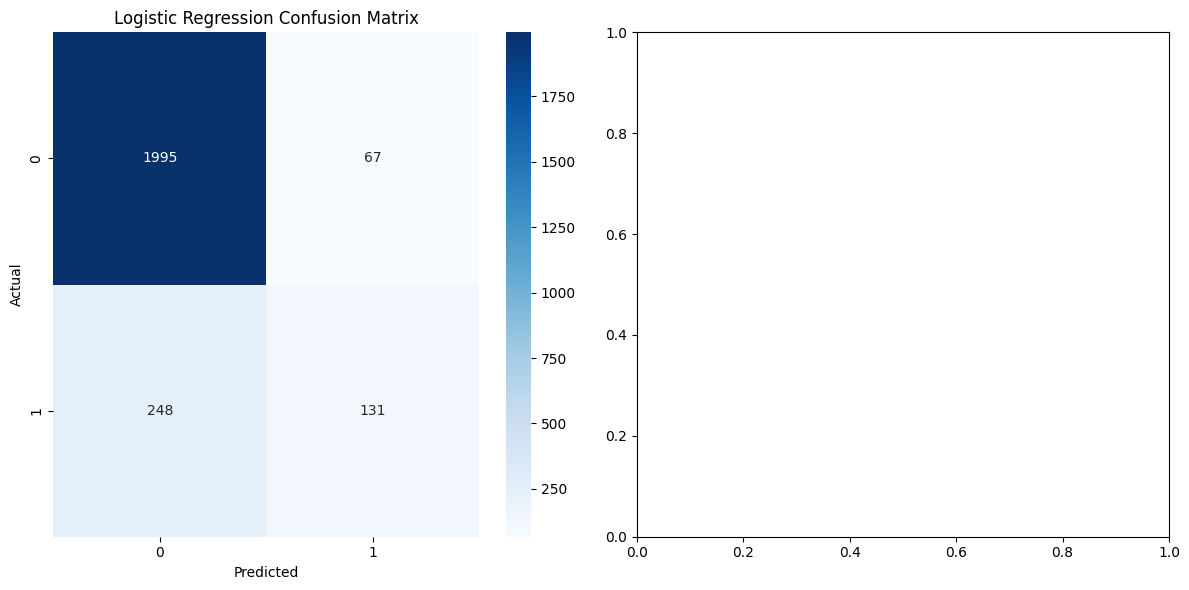

In [29]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lreg = LogisticRegression(max_iter = 1000)  
lreg.fit(X_train, y_train)

y_plreg = lreg.predict(X_test)

print("Akurasi Model Logistic Regression: ", accuracy_score(y_test, y_plreg))
print("\nClassification Report Logistic Regression: \n", classification_report(y_test, y_plreg))

fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.heatmap(confusion_matrix(y_test, y_plreg), annot = True, fmt = 'd', cmap = 'Blues', ax = axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
plt.tight_layout()
plt.show()


## Training - Testing

- Metode Repeated Holdout

-> Random Forest

Iteration 1:
Akurasi: 0.8996
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2063
        True       0.74      0.55      0.63       378

    accuracy                           0.90      2441
   macro avg       0.83      0.76      0.79      2441
weighted avg       0.89      0.90      0.89      2441

--------------------------------------------------
Iteration 2:
Akurasi: 0.8968
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2032
        True       0.76      0.56      0.65       409

    accuracy                           0.90      2441
   macro avg       0.84      0.76      0.79      2441
weighted avg       0.89      0.90      0.89      2441

--------------------------------------------------
Iteration 3:
Akurasi: 0.8992
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2059
        True       0.75      0.54      0.63     

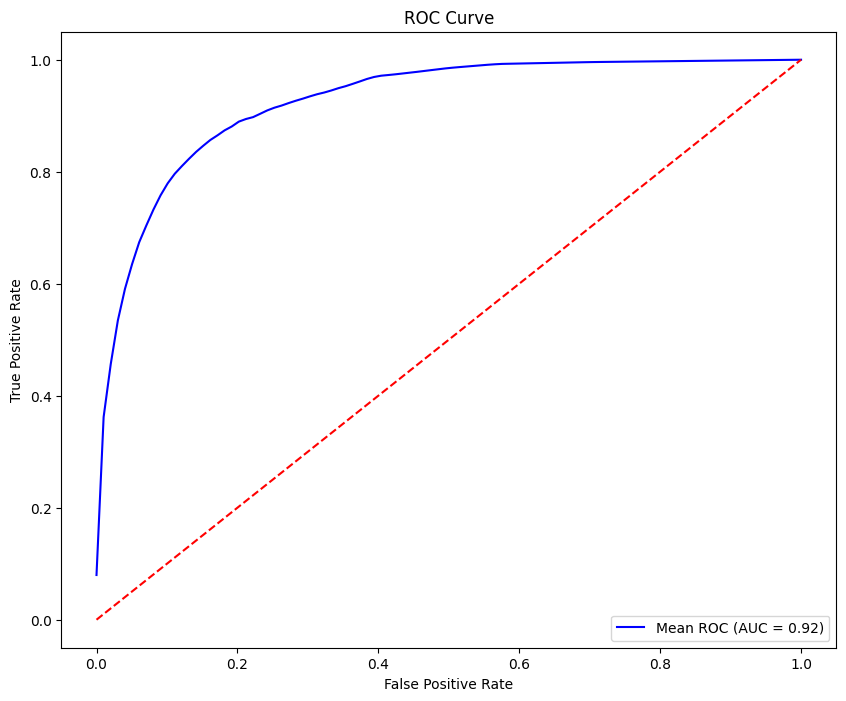

In [30]:
from sklearn.metrics import recall_score, roc_curve, auc

X = df[['Administrative', 'AD', 'Informational', 'ID', 'ProductRelated', 'PRD', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OS', 'Browser', 
        'Region', 'Month', 'TrafficType', 'VisitorType', 'Weekend']]
Y = df['Revenue']

k = 5 
accuracy_scores = []
all_fprrf1 = []
all_tprrf1 = []
mean_fprrf1 = np.linspace(0, 1, 100)

for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Iteration {i+1}:")
    print(f"Akurasi: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
    y_predh = model.predict(X_test)
    y_pred_probh = model.predict_proba(X_test)[:, 1]
    
    fprrf1, tprrf1, thresholds = roc_curve(y_test, y_pred_probh)
    tpr_interrf1 = np.interp(mean_fprrf1, fprrf1, tprrf1)
    all_fprrf1.append(mean_fprrf1)
    all_tprrf1.append(tpr_interrf1)

avg_accuracyrf1 = np.mean(accuracy_scores)
print(f"\nRata-rata Akurasi dari {k} iterasi: {avg_accuracyrf1:.4f}")

recallrf1 = recall_score(y_test, y_pred)
print(f"Sensitivitas (Recall) Model: {recallrf1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]

specificityrf1 = TN / (TN + FP)
print(f"Spesifisitas: {specificityrf1:.4f}")

mean_tprrf1 = np.mean(all_tprrf1, axis=0)
auc_scorerf1 = auc(mean_fprrf1, mean_tprrf1)
print(f"AUC Score: {auc_scorerf1:.4f}")

plt.figure(figsize=(10, 8))
plt.plot(mean_fprrf1, mean_tprrf1, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorerf1)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()


-> Logistic Regression

E:\Softwares\Py Modules\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 1:
Akurasi: 0.8763
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2063
        True       0.73      0.32      0.44       378

    accuracy                           0.88      2441
   macro avg       0.81      0.65      0.69      2441
weighted avg       0.86      0.88      0.86      2441

--------------------------------------------------


E:\Softwares\Py Modules\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 2:
Akurasi: 0.8751
              precision    recall  f1-score   support

       False       0.88      0.98      0.93      2032
        True       0.77      0.36      0.49       409

    accuracy                           0.88      2441
   macro avg       0.83      0.67      0.71      2441
weighted avg       0.86      0.88      0.86      2441

--------------------------------------------------


E:\Softwares\Py Modules\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 3:
Akurasi: 0.8685
              precision    recall  f1-score   support

       False       0.88      0.97      0.93      2059
        True       0.67      0.31      0.42       382

    accuracy                           0.87      2441
   macro avg       0.78      0.64      0.67      2441
weighted avg       0.85      0.87      0.85      2441

--------------------------------------------------


E:\Softwares\Py Modules\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 4:
Akurasi: 0.8894
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2065
        True       0.77      0.40      0.53       376

    accuracy                           0.89      2441
   macro avg       0.84      0.69      0.73      2441
weighted avg       0.88      0.89      0.87      2441

--------------------------------------------------
Iteration 5:
Akurasi: 0.8816
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2066
        True       0.75      0.34      0.47       375

    accuracy                           0.88      2441
   macro avg       0.82      0.66      0.70      2441
weighted avg       0.87      0.88      0.86      2441

--------------------------------------------------

Rata-rata Akurasi dari 5 iterasi: 0.8782
Sensitivitas (Recall) Model: 0.3440
Spesifisitas: 0.9792
AUC Score: 0.8730


E:\Softwares\Py Modules\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


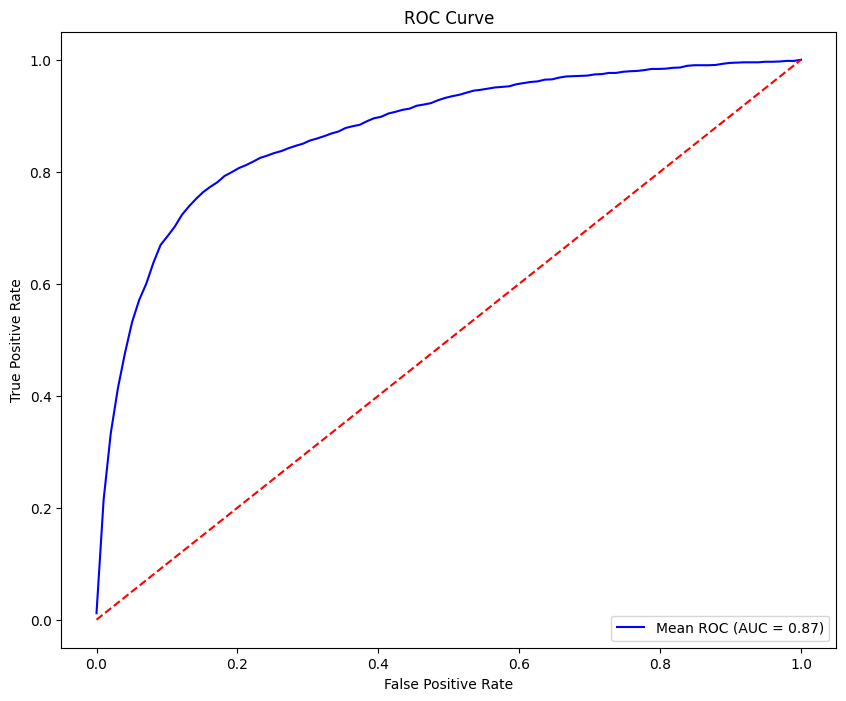

In [31]:
X = df[['Administrative', 'AD', 'Informational', 'ID', 'ProductRelated', 'PRD', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OS', 'Browser', 
        'Region', 'Month', 'TrafficType', 'VisitorType', 'Weekend']]
Y = df['Revenue']

k = 5 
accuracy_scores = []
all_fprlr1 = []
all_tprlr1 = []
mean_fprlr1 = np.linspace(0, 1, 100)

for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)
    
    model = LogisticRegression(max_iter = 1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Iteration {i+1}:")
    print(f"Akurasi: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
    y_predh = model.predict(X_test)
    y_pred_probh = model.predict_proba(X_test)[:, 1]
    
    fprlr1, tprlr1, thresholds = roc_curve(y_test, y_pred_probh)
    tpr_interlr1 = np.interp(mean_fprlr1, fprlr1, tprlr1)
    all_fprlr1.append(mean_fprlr1)
    all_tprlr1.append(tpr_interlr1)

avg_accuracylr1 = np.mean(accuracy_scores)
print(f"\nRata-rata Akurasi dari {k} iterasi: {avg_accuracylr1:.4f}")

from sklearn.metrics import recall_score
recalllr1 = recall_score(y_test,y_pred)
print(f"Sensitivitas (Recall) Model: {recalllr1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]

specificitylr1 = TN / (TN + FP)
print(f"Spesifisitas: {specificitylr1:.4f}")

mean_tprlr1 = np.mean(all_tprlr1, axis = 0)
auc_scorelr1 = auc(mean_fprlr1, mean_tprlr1)
print(f"AUC Score: {auc_scorelr1:.4f}")

plt.figure(figsize = (10, 8))
plt.plot(mean_fprlr1, mean_tprlr1, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorelr1)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

- Metode k-fold CV

-> Random Forest

Fold Accuracy: 0.9054
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      2079
        True       0.75      0.55      0.63       362

    accuracy                           0.91      2441
   macro avg       0.84      0.76      0.79      2441
weighted avg       0.90      0.91      0.90      2441

--------------------------------------------------
Fold Accuracy: 0.9054
              precision    recall  f1-score   support

       False       0.93      0.96      0.95      2088
        True       0.71      0.58      0.64       353

    accuracy                           0.91      2441
   macro avg       0.82      0.77      0.79      2441
weighted avg       0.90      0.91      0.90      2441

--------------------------------------------------
Fold Accuracy: 0.9033
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2036
        True       0.76      0.61      0.68       405

    accuracy  

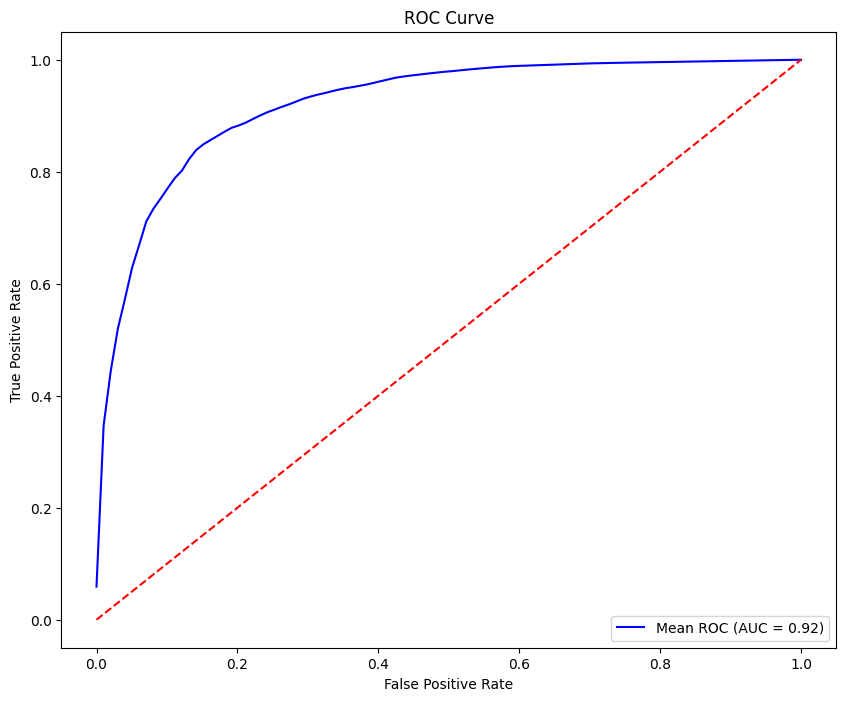

In [32]:
from sklearn.model_selection import KFold
X = df[['Administrative', 'AD', 'Informational', 'ID', 'ProductRelated', 'PRD', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OS', 'Browser', 
        'Region', 'Month', 'TrafficType', 'VisitorType', 'Weekend']]
Y = df['Revenue']

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

all_fprrf2 = []
all_tprrf2 = []
mean_fprrf2 = np.linspace(0, 1, 100)
accuracy_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    model = RandomForestClassifier(n_estimators = 100, random_state = 42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Fold Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    fprrf2, tprrf2, thresholds = roc_curve(y_test, y_pred_prob)
    tpr_interrf2 = np.interp(mean_fprrf2, fprrf2, tprrf2)
    all_fprrf2.append(fprrf2)
    all_tprrf2.append(tpr_interrf2)

avg_accuracyrf2 = np.mean(accuracy_scores)
print(f"\nRata-rata Akurasi dari {kf.get_n_splits()} fold: {avg_accuracyrf2:.4f}")

recallrf2 = recall_score(y_test, y_pred)
print(f"Sensitivitas (Recall) Model: {recallrf2:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]

specificityrf2 = TN / (TN + FP)
print(f"Spesifisitas: {specificityrf2:.4f}")

mean_tprrf2 = np.mean(all_tprrf2, axis = 0)
auc_scorerf2 = auc(mean_fprrf2, mean_tprrf2)
print(f"AUC Score: {auc_scorerf2:.4f}")

plt.figure(figsize = (10, 8))
plt.plot(mean_fprrf2, mean_tprrf2, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorerf2)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()


-> Logistic Regression

E:\Softwares\Py Modules\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.8841
              precision    recall  f1-score   support

       False       0.90      0.98      0.93      2079
        True       0.72      0.36      0.48       362

    accuracy                           0.88      2441
   macro avg       0.81      0.67      0.71      2441
weighted avg       0.87      0.88      0.87      2441

--------------------------------------------------


E:\Softwares\Py Modules\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.8878
              precision    recall  f1-score   support

       False       0.90      0.97      0.94      2088
        True       0.70      0.39      0.50       353

    accuracy                           0.89      2441
   macro avg       0.80      0.68      0.72      2441
weighted avg       0.87      0.89      0.87      2441

--------------------------------------------------


E:\Softwares\Py Modules\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.8791
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2036
        True       0.78      0.38      0.51       405

    accuracy                           0.88      2441
   macro avg       0.83      0.68      0.72      2441
weighted avg       0.87      0.88      0.86      2441

--------------------------------------------------


E:\Softwares\Py Modules\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.8648
              precision    recall  f1-score   support

       False       0.89      0.96      0.92      2059
        True       0.63      0.33      0.43       382

    accuracy                           0.86      2441
   macro avg       0.76      0.65      0.68      2441
weighted avg       0.85      0.86      0.85      2441

--------------------------------------------------
Fold Accuracy: 0.8775
              precision    recall  f1-score   support

       False       0.88      0.98      0.93      2035
        True       0.79      0.36      0.49       406

    accuracy                           0.88      2441
   macro avg       0.84      0.67      0.71      2441
weighted avg       0.87      0.88      0.86      2441

--------------------------------------------------

Rata-rata Akurasi dari 5 fold: 0.8889
Sensitivitas (Recall) Model: 0.3571
Spesifisitas: 0.9813
AUC Score: 0.8793


E:\Softwares\Py Modules\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


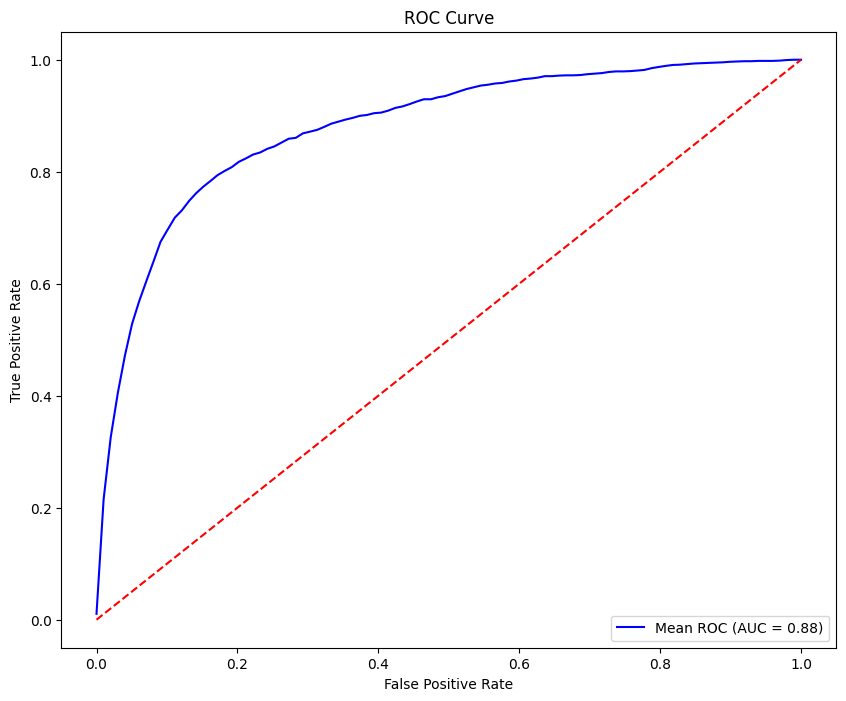

In [33]:
X = df[['Administrative', 'AD', 'Informational', 'ID', 'ProductRelated', 'PRD', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OS', 'Browser', 
        'Region', 'Month', 'TrafficType', 'VisitorType', 'Weekend']]
Y = df['Revenue']

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

all_fprlr2 = []
all_tprlr2 = []
mean_fprlr2 = np.linspace(0, 1, 100)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    model = LogisticRegression(max_iter = 1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Fold Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    fprlr2, tprlr2, thresholds = roc_curve(y_test, y_pred_prob)
    tpr_interlr2 = np.interp(mean_fprlr2, fprlr2, tprlr2)
    all_fprlr2.append(mean_fprlr2)
    all_tprlr2.append(tpr_interlr2)

avg_accuracylr2 = np.mean(accuracy_scores)
print(f"\nRata-rata Akurasi dari {kf.get_n_splits()} fold: {avg_accuracylr2:.4f}")

recalllr2 = recall_score(y_test,y_pred)
print(f"Sensitivitas (Recall) Model: {recalllr2:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]

specificitylr2 = TN / (TN + FP)
print(f"Spesifisitas: {specificitylr2:.4f}")

mean_tprlr2 = np.mean(all_tprlr2, axis = 0)
auc_scorelr2 = auc(mean_fprlr2, mean_tprlr2)
print(f"AUC Score: {auc_scorelr2:.4f}")

plt.figure(figsize = (10, 8))
plt.plot(mean_fprlr2, mean_tprlr2, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorelr2)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

## Evaluasi Metriks

- Akurasi

In [34]:
# Akurasi menggunakan Repeated Holdout:
print(f"Rata-rata Akurasi dari {k} iterasi Random Forest: {avg_accuracyrf1:.4f}")
print(f"Rata-rata Akurasi dari {k} iterasi Logistic Regression: {avg_accuracylr1:.4f}")

#Akurasi menggunakan kFold CV
print(f"Rata-rata Akurasi dari {kf.get_n_splits()} Fold Random Forest: {avg_accuracyrf2:.4f}")
print(f"Rata-rata Akurasi dari {kf.get_n_splits()} Fold Logistic Regression: {avg_accuracylr2:.4f}")

Rata-rata Akurasi dari 5 iterasi Random Forest: 0.9014
Rata-rata Akurasi dari 5 iterasi Logistic Regression: 0.8782
Rata-rata Akurasi dari 5 Fold Random Forest: 0.8992
Rata-rata Akurasi dari 5 Fold Logistic Regression: 0.8889


- Sensitivitas

In [35]:
# Sensitivitas menggunakan Repeated Holdout
print(f"Sensitivitas (Recall) Model Repeated Holdout Random Forest: {recallrf1:.4f}")
print(f"Sensitivitas (Recall) Model Repeated Holdout Logistic Regression: {recalllr1:.4f}")

# Sensitivitas menggunakan kFold CV
print(f"Sensitivitas (Recall) Model kFold Random Forest: {recallrf2:.4f}")
print(f"Sensitivitas (Recall) Model kFold Logistic Regression: {recalllr2:.4f}")

Sensitivitas (Recall) Model Repeated Holdout Random Forest: 0.5813
Sensitivitas (Recall) Model Repeated Holdout Logistic Regression: 0.3440
Sensitivitas (Recall) Model kFold Random Forest: 0.5739
Sensitivitas (Recall) Model kFold Logistic Regression: 0.3571


- Spesifisitas

In [36]:
# Spesifisitas menggunakan Repeated Holdout
print(f"Spesifisitas Repeated Holdout Random Forest: {specificityrf1:.4f}")
print(f"Spesifisitas Repeated Holdout Logistic Regression: {specificitylr1:.4f}")

# Spesifisitas menggunakan kFold CV
print(f"Spesifisitas kFold Random Forest: {specificityrf2:.4f}")
print(f"Spesifisitas kFold Logistic Regression: {specificitylr2:.4f}")

Spesifisitas Repeated Holdout Random Forest: 0.9661
Spesifisitas Repeated Holdout Logistic Regression: 0.9792
Spesifisitas kFold Random Forest: 0.9597
Spesifisitas kFold Logistic Regression: 0.9813


- ROC

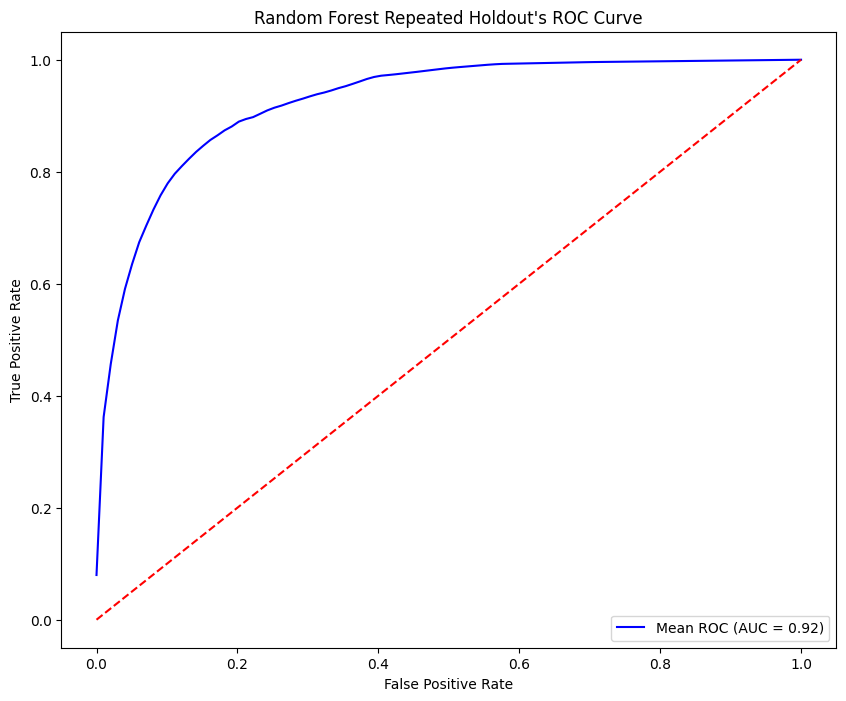

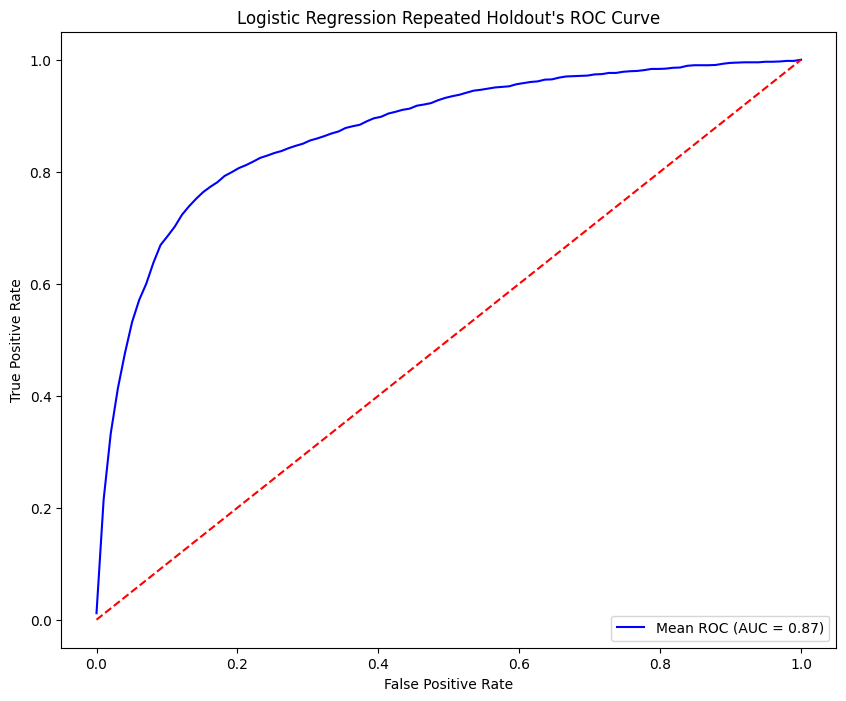

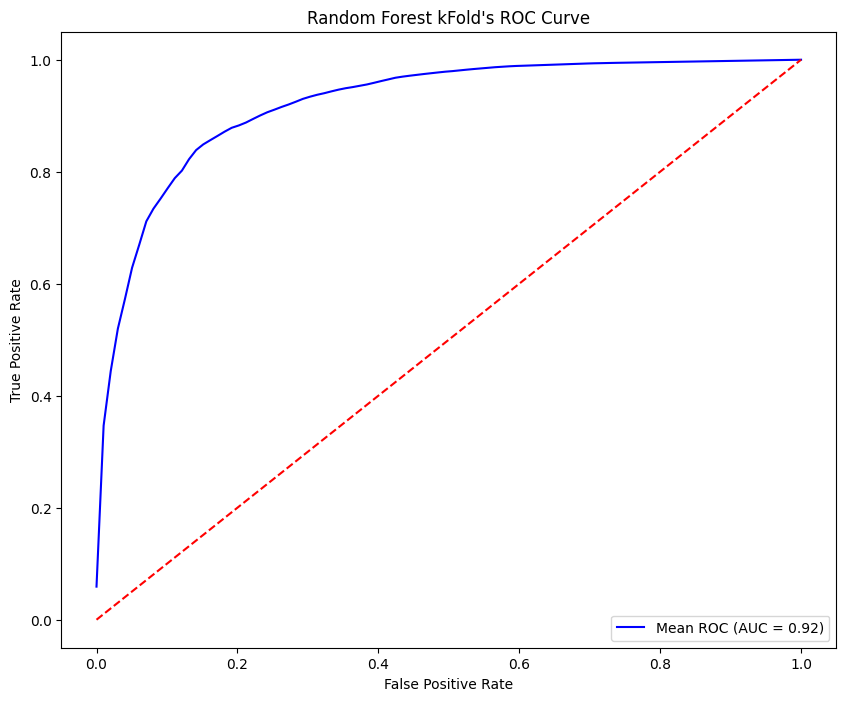

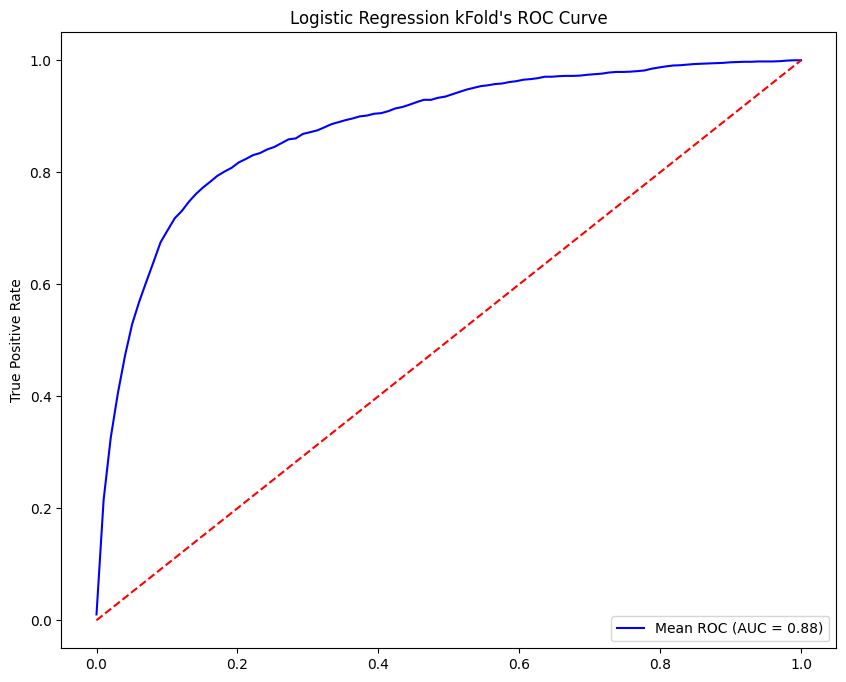

In [37]:
# Kurva ROC untuk Repeated Holdout
plt.figure(figsize = (10, 8))
plt.plot(mean_fprrf1, mean_tprrf1, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorerf1)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest Repeated Holdout's ROC Curve")
plt.legend(loc = 'lower right')
plt.show()

plt.figure(figsize = (10, 8))
plt.plot(mean_fprlr1, mean_tprlr1, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorelr1)
plt.plot([0, 1], [0, 1], color='r', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Logistic Regression Repeated Holdout's ROC Curve")
plt.legend(loc='lower right')
plt.show()

# Kurva ROC untuk kFold
plt.figure(figsize = (10, 8))
plt.plot(mean_fprrf2, mean_tprrf2, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorerf2)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest kFold's ROC Curve")
plt.legend(loc = 'lower right')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(mean_fprlr2, mean_tprlr2, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorelr2)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--')  
plt.ylabel('True Positive Rate')
plt.title("Logistic Regression kFold's ROC Curve")
plt.legend(loc = 'lower right')
plt.show()

- AUC

In [38]:
# Nilai AUC untuk Repeated Holdout
print(f"Random Forest Repeated Holdout's AUC Score: {auc_scorerf1:.4f}")
print(f"Logistic Regression Repeated Holdout's AUC Score: {auc_scorelr1:.4f}")

# Nilai AUC untuk kFold
print(f"Random Forest kFold's AUC Score: {auc_scorerf2:.4f}")
print(f"Logistic Regression kFold's AUC Score: {auc_scorelr2:.4f}")

Random Forest Repeated Holdout's AUC Score: 0.9246
Logistic Regression Repeated Holdout's AUC Score: 0.8730
Random Forest kFold's AUC Score: 0.9209
Logistic Regression kFold's AUC Score: 0.8793
